# Day 1 Enron Text mining exercise
[![Author - DanRamirez](https://img.shields.io/badge/Author-DanRamirez-2ea44f?style=for-the-badge)](https://github.com/Dandata0101)
![Python - Version](https://img.shields.io/badge/PYTHON-3.11-red?style=for-the-badge&logo=python&logoColor=white)

## Enron Email Analysis

This Python script is designed to perform an analysis on a dataset of emails, specifically focusing on identifying and visualizing emails related to selling Enron stock. The analysis is carried out through several key functions, each encapsulating a unique part of the process.

### Features

- **Filtering Emails**: The script filters emails containing specific search terms related to selling Enron stock, using pandas for data manipulation.
- **Unique Senders**: Identifies unique senders within the filtered emails, showcasing the variety of sources discussing the search terms.
- **Flagging Emails**: Adds a flag to the dataset for emails that match the search criteria, aiding in quick identification of relevant data points.
- **Rich Display**: Utilizes the `rich` library to display filtered emails and statistics in a visually appealing manner within the console, including a detailed table of the first few filtered emails and a summary of flagged emails.
- **Word Cloud Visualization**: Generates a word cloud from the content of the filtered emails, providing a graphical representation of the most frequent terms related to the topic of interest.

### Usage

To run the script, ensure you have a CSV file containing your email dataset with at least the following columns: `Message-ID`, `From`, `To`, `Date`, and `clean_content`. Adjust the `csv_file_path` and `search_terms` variables as necessary to match your dataset and analysis focus.

### Installation

This script requires Python 3.x and the following libraries: `pandas`, `rich`, `matplotlib`, and `wordcloud`. You can install these dependencies using `pip`:

```sh
pip install pandas rich matplotlib wordcloud



## Function Definition

In [1]:

import pandas as pd
import os
from rich.console import Console
from rich.table import Table
from rich import box
from wordcloud import WordCloud
import matplotlib.pyplot as plt
print('')
print('')

# Set up the console for rich printing
console = Console()

# Define file path
csv_file_path = os.path.join(os.getcwd(), '01-data/FD_01_enron.csv')

# Read CSV file into DataFrame
df = pd.read_csv(csv_file_path)



# Function to print unique senders from filtered emails
def print_unique_senders(emails_df):
    console.print(f"Unique Senders in Filtered Emails:", style="bold underline")
    unique_senders = emails_df['From'].dropna().unique()
    for sender in unique_senders:
        console.print(f"- {sender}")

# Function to display flagged email count
def display_flagged_email_count(df):
    console.print("Flagged Emails Count:", style="bold underline")
    flag_table = Table(show_header=True, header_style="bold magenta")
    flag_table.add_column("Flag", style="dim")
    flag_table.add_column("Count", justify="right")
    flag_counts = df['flag'].value_counts().items()
    for flag, count in flag_counts:
        flag_table.add_row(str(flag), str(count))
    console.print(flag_table)

# Function to display filtered emails in a rich table
def display_email_table(emails_df):
    console.print("Filtered Email(s):", style="bold underline")
    email_table = Table(show_header=True, header_style="bold magenta", box=box.ROUNDED)
    email_table.add_column("Message-ID", style="dim", width=100, overflow="fold")
    email_table.add_column("From", width=100)
    email_table.add_column("To", width=100, overflow="fold")
    email_table.add_column("Date", style="dim", width=100)
    email_table.add_column("Content", overflow="fold", width=100)
    for _, row in emails_df.head().iterrows():
        email_table.add_row(
            str(row['Message-ID']),
            row['From'],
            row['To'],
            str(row['Date']),
            row['clean_content'][:200] + "..."
        )
    console.print(email_table)

# Function to generate and display word cloud
def generate_display_wordcloud(text):
    console.print("Generating and displaying word cloud for filtered emails", style="bold underline")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Emails Containing Search Terms')
    plt.show()



## Function Calls

Unique Senders in Filtered Emails:

- ('sarah.palmer@enron.com')

Flagged Emails Count:

┏━━━━━━┳━━━━━━━┓
┃ Flag ┃ Count ┃
┡━━━━━━╇━━━━━━━┩
│ 0    │  2089 │
│ 1    │     1 │
└──────┴───────┘

Filtered Email(s):

╭──────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────╮
│ Message-ID           │ From                 │ To                   │ Date                 │ Content             │
├──────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ <6336501.10758411543 │ ('sarah.palmer@enro… │ ('sarah.palmer@enron │ 2002-02-01 14:53:35  │ joint venture enron │
│ 11.JavaMail.evans@th │                      │ .com')               │                      │ meeting belies      │
│ yme>                 │                      │                      │                      │ officers claims th  │
│                      │                      │                      │                      │ e dark minutes show │
│                      │                      │                      │                      │ hearing novel       │
│                      │                      │                      │                      │ partnerships        │
│                      │                      │                      │                      │ inflated ea rnings  │
│                      │                      │                      │                      │ present lay         │
│                      │                      │                      │                      │ skilling fastow     │
│                      │                      │                      │                      │ wall street journal │
│                      │                      │                      │                      │ ex enron ceo agrees │
│                      │                      │                      │                      │ testify pane...     │
╰──────────────────────┴──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────╯

Generating and displaying word cloud for filtered emails

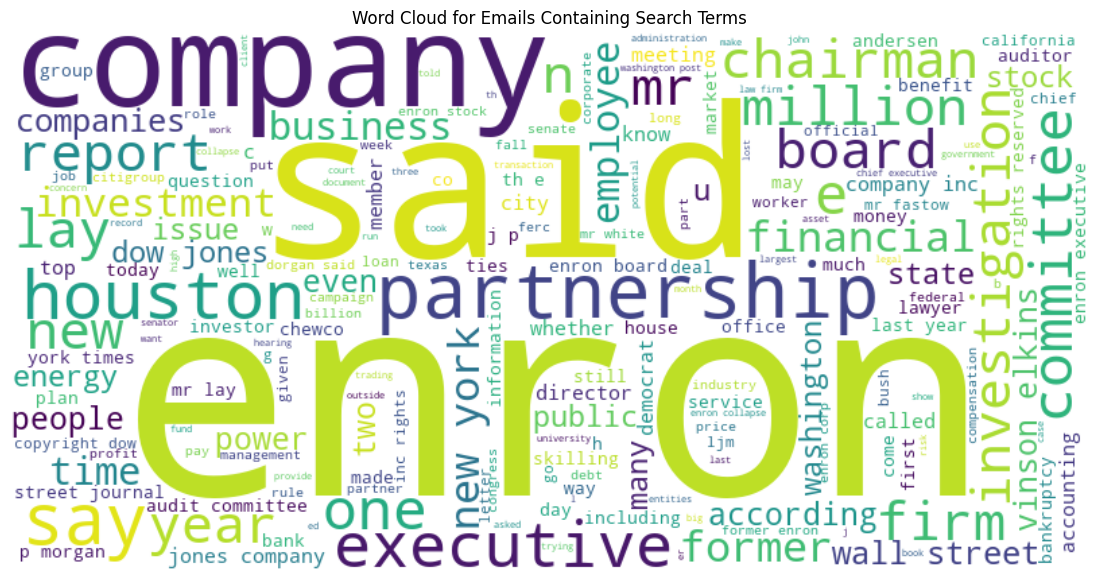

In [2]:
# Define search terms and filter rows
search_terms = ['sell enron stock']
filtered_emails = df[df['clean_content'].str.contains('|'.join(search_terms), na=False)]

# Set flag for matching search terms
df['flag'] = df['clean_content'].str.contains('|'.join(search_terms), na=False).astype(int)
    
print_unique_senders(filtered_emails)
display_flagged_email_count(df)
display_email_table(filtered_emails)
    
# Combine content for word cloud
text_for_wordcloud = " ".join(email for email in filtered_emails['clean_content'].dropna())
generate_display_wordcloud(text_for_wordcloud)
